
<a href="https://colab.research.google.com/github/Astatium5/SemEvalProject-NLP-class/blob/main/Running_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [ ]:
# --- 1. Environment Setup ---
import os
os.environ['TOKENIZERS_PARALLELISM'] = 'false'  # Stops huggingface warnings
os.environ['COLAB_DISABLE_DRIVE_MOUNT'] = '1'   # Avoid waiting on Drive auth prompts

# --- 2. Project Info ---
REPO_URL = 'https://github.com/Astatium5/SemEvalProject-NLP-class.git'
REPO_NAME = 'SemEvalProject-NLP-class'
PROJECT_PATH = f'/content/{REPO_NAME}'

# Local folders inside the runtime (fast SSD, plenty of space)
LOCAL_RESULTS_PATH = f'{PROJECT_PATH}/results'
LOCAL_MODELS_PATH  = f'{PROJECT_PATH}/models'

# --- 3. Clone or Update the Repo Directly in /content ---
%cd /content

if not os.path.exists(PROJECT_PATH):
    print(f"Cloning {REPO_NAME}...")
    !git clone {REPO_URL} {REPO_NAME}
else:
    print('Repo already exists → pulling latest changes...')
    %cd {PROJECT_PATH}
    !git pull origin main

# Always make sure we're inside the project folder
%cd {PROJECT_PATH}
!pwd
!ls -la

# --- 4. Install Dependencies ---
!pip install -q transformers datasets scikit-learn setfit

# --- 5. Create Local Save Folders (inside the repo – super fast I/O) ---
!mkdir -p {LOCAL_RESULTS_PATH}
!mkdir -p {LOCAL_MODELS_PATH}

from pathlib import Path
from google.colab import drive

drive.mount("/content/drive")

PROJECT_ROOT = Path("/content/SemEvalProject-NLP-class")
LOCAL_CHECKPOINTS_PATH = str(PROJECT_ROOT / "checkpoints")

DRIVE_ARTIFACTS_DIR = Path("/content/drive/MyDrive/SemEval_QEvasion")
DRIVE_ARTIFACTS_DIR.mkdir(parents=True, exist_ok=True)

print('\nSetup complete!')
print(f"Project location : {PROJECT_PATH}")
print(f"Results will be saved to  → {LOCAL_RESULTS_PATH}")
print(f"Models will be saved to   → {LOCAL_MODELS_PATH}")

# Optional: Quick download of everything at the end (uncomment when training finishes)
# !zip -r /content/SemEvalProject_Results_$(date +%Y%m%d_%H%M).zip results/ models/
# from google.colab import files
# files.download(f"/content/SemEvalProject_Results_$(date +%Y%m%d_%H%M).zip")


/content
Repo already exists → pulling latest changes...
/content/SemEvalProject-NLP-class
From https://github.com/Astatium5/SemEvalProject-NLP-class
 * branch            main       -> FETCH_HEAD
Already up to date.
/content/SemEvalProject-NLP-class
/content/SemEvalProject-NLP-class
total 956
drwxr-xr-x 11 root root   4096 Dec  9 08:55  .
drwxr-xr-x  1 root root   4096 Dec  9 07:38  ..
drwxr-xr-x  3 root root   4096 Dec  9 10:43  checkpoints
-rw-r--r--  1 root root 679353 Dec  9 02:17 'DataVisualizationForTask1&2.ipynb'
-rw-r--r--  1 root root   5506 Dec  9 08:47  encoder_inference.py
-rw-r--r--  1 root root   6848 Dec  9 03:56  encoder_train.py
drwxr-xr-x  8 root root   4096 Dec  9 10:49  .git
-rw-r--r--  1 root root   1237 Dec  9 02:17  .gitignore
drwxr-xr-x  2 root root   4096 Dec  9 02:24  .ipynb_checkpoints
-rw-r--r--  1 root root   1071 Dec  9 02:17  LICENSE
drwxr-xr-x  7 root root   4096 Dec  9 10:44  models
-rw-r--r--  1 root root   1010 Dec  9 02:17  NLP_SemEval_2026_Task_6_Te


## Task 1 (Direct Clarity) Experiments Only
All cells below are limited to Subtask 1. Models covered: SetFit, XLNet-large, RoBERTa-large, DeBERTa-v3-base, plus a RoBERTa+DeBERTa ensemble and final CSV generation.


In [ ]:

# --- EXPERIMENT: roberta-large - Subtask 1 (Direct Clarity) ---
print('STARTING: roberta-large for Subtask 1...')

MODEL_NAME = 'roberta-large'
EXPERIMENT = 'direct_clarity'
BATCH_SIZE = 8
MODEL_ID = MODEL_NAME.split('/')[-1]

# --- 1. TRAIN ---
# !python encoder_train.py --model_name {MODEL_NAME} --experiment {EXPERIMENT} --batch_size {BATCH_SIZE}

# --- 2. INFER ---
!python encoder_inference.py --model_name {MODEL_NAME} --experiment {EXPERIMENT}

print(f'Training & inference complete for {MODEL_NAME}. Results stored in ./results.')


STARTING: roberta-large for Subtask 1...
2025-12-09 08:56:19.027456: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765270579.050334  101999 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765270579.056899  101999 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765270579.074745  101999 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765270579.074780  101999 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765270579.074783  101999 computat

In [ ]:

# --- EXPERIMENT: deberta-v3-base - Subtask 1 (Direct Clarity) ---
print('STARTING: deberta-v3-base for Subtask 1...')

MODEL_NAME = 'microsoft/deberta-v3-base'
EXPERIMENT = 'direct_clarity'
BATCH_SIZE = 8
MODEL_ID = MODEL_NAME.split('/')[-1]

# --- 1. TRAIN ---
# !python encoder_train.py --model_name {MODEL_NAME} --experiment {EXPERIMENT} --batch_size {BATCH_SIZE}

# --- 2. INFER ---
!python encoder_inference.py --model_name {MODEL_NAME} --experiment {EXPERIMENT}

print(f'Training & inference complete for {MODEL_NAME}. Results stored in ./results.')


STARTING: deberta-v3-base for Subtask 1...
2025-12-09 08:57:05.159675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765270625.181240  102271 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765270625.187616  102271 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765270625.203916  102271 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765270625.203949  102271 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765270625.203952  102271 comput

In [ ]:

# --- EXPERIMENT: xlnet-large-cased - Subtask 1 (Direct Clarity) ---
print('STARTING: xlnet-large-cased for Subtask 1...')

MODEL_NAME = 'xlnet-large-cased'
EXPERIMENT = 'direct_clarity'
BATCH_SIZE = 4  # XLNet-large is heavier; keep batch small for Colab GPUs
MODEL_ID = MODEL_NAME.split('/')[-1]

# --- 1. TRAIN ---
# !python encoder_train.py --model_name {MODEL_NAME} --experiment {EXPERIMENT} --batch_size {BATCH_SIZE}

# --- 2. INFER ---
!python encoder_inference.py --model_name {MODEL_NAME} --experiment {EXPERIMENT}

print(f'Training & inference complete for {MODEL_NAME}. Results stored in ./results.')


STARTING: xlnet-large-cased for Subtask 1...
2025-12-09 08:57:30.961802: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765270650.983657  102453 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765270650.990179  102453 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765270651.007809  102453 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765270651.007849  102453 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765270651.007852  102453 comp

In [ ]:
print("STARTING: SetFit for Subtask 1...")

import os
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "disabled"
os.environ["WANDB_SILENT"] = "true"

import pandas as pd
from datasets import load_dataset, Dataset
from setfit import SetFitModel, Trainer, TrainingArguments
from pathlib import Path
import torch

label2id = {"Clear Reply": 0, "Ambivalent": 1, "Clear Non-Reply": 2}
id2label = {v: k for k, v in label2id.items()}

dataset = load_dataset("ailsntua/QEvasion")
train_split = dataset["train"].filter(lambda x: x["clarity_label"] != "")
test_split  = dataset["test"].filter(lambda x: x["clarity_label"] != "")

def to_hf_dataset(split):
    texts = [f"Question: {q} Answer: {a}" for q, a in zip(split["interview_question"], split["interview_answer"])]
    labels = [label2id[l] for l in split["clarity_label"]]
    return Dataset.from_dict({"text": texts, "label": labels})

train_ds = to_hf_dataset(train_split)
test_ds  = to_hf_dataset(test_split)

MODEL_DIR = Path(LOCAL_MODELS_PATH) / "setfit-qaevasion-direct_clarity"
MODEL_HEAD = MODEL_DIR / "model_head.pkl"  # fitted sklearn head lives here

device = "cuda" if torch.cuda.is_available() else "cpu"

def train_and_save():
    model = SetFitModel.from_pretrained("sentence-transformers/ ", num_labels=3)
    model.to(device)

    args = TrainingArguments(
        num_iterations=5,
        batch_size=32,
        num_epochs=3,
        body_learning_rate=2e-5,
        head_learning_rate=1e-2,
        use_amp=True,
        report_to=[],
    )

    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=train_ds,
        eval_dataset=test_ds,
        column_mapping={"text": "text", "label": "label"},
    )

    trainer.train()
    MODEL_DIR.parent.mkdir(parents=True, exist_ok=True)
    trainer.model.save_pretrained(str(MODEL_DIR))
    return trainer.model

if MODEL_DIR.exists() and MODEL_HEAD.exists():
    print(f"Found fitted SetFit model at {MODEL_DIR}. Skipping training.")
    model = SetFitModel.from_pretrained(str(MODEL_DIR))
    model.to(device)
else:
    print(f"SetFit model missing or nunfitted (expected {MODEL_HEAD}). Training...")
    model = train_and_save()

preds = model.predict(test_ds["text"])
if hasattr(preds, "detach"):
    preds = preds.detach().cpu().tolist()
else:
    preds = list(preds)

pred_labels = [id2label[i] for i in preds]
true_labels = [id2label[i] for i in test_ds["label"]]

out_path = Path(LOCAL_RESULTS_PATH) / "setfit-direct_clarity.csv"
out_path.parent.mkdir(parents=True, exist_ok=True)
pd.DataFrame({"true_labels": true_labels, "pred_labels": pred_labels}).to_csv(out_path, index=False)

print(f"SetFit complete. Results stored at {out_path}.")


STARTING: SetFit for Subtask 1...
SetFit model missing or unfitted (expected /content/SemEvalProject-NLP-class/models/setfit-qaevasion-direct_clarity/model_head.pkl). Training...


model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.
Applying column mapping to the training dataset
Applying column mapping to the evaluation dataset
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future ver

Map:   0%|          | 0/3448 [00:00<?, ? examples/s]

***** Running training *****
  Num unique pairs = 34480
  Batch size = 32
  Num epochs = 3
/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/pin_memory.py:57: DeprecationWarning: The argument 'device' of Tensor.pin_memory() is deprecated. Please do not pass this argument. (Triggered internally at /pytorch/aten/src/ATen/native/Memory.cpp:46.)
  return data.pin_memory(device)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/pin_memory.py:57: DeprecationWarning: The argument 'device' of Tensor.is_pinned() is deprecated. Please do not pass this argument. (Triggered internally at /pytorch/aten/src/ATen/native/Memory.cpp:31.)
  return data.pin_memory(device)


Step,Training Loss
1,0.236700
50,0.252200
100,0.256700
150,0.249100
200,0.254100
250,0.246900
300,0.245600
350,0.242900
400,0.247700
450,0.240800


/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/pin_memory.py:57: DeprecationWarning: The argument 'device' of Tensor.pin_memory() is deprecated. Please do not pass this argument. (Triggered internally at /pytorch/aten/src/ATen/native/Memory.cpp:46.)
  return data.pin_memory(device)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/pin_memory.py:57: DeprecationWarning: The argument 'device' of Tensor.is_pinned() is deprecated. Please do not pass this argument. (Triggered internally at /pytorch/aten/src/ATen/native/Memory.cpp:31.)
  return data.pin_memory(device)
/usr/local/lib/python3.12/dist-packages/jupyter_client/sessi

cp: cannot stat '{out_path}': No such file or directory
SetFit complete. Results stored at /content/SemEvalProject-NLP-class/results/setfit-direct_clarity.csv and copied to Drive.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())


In [ ]:
# --- Ensemble: RoBERTa-large + DeBERTa-v3-base (Subtask 1) ---
print('Building ensemble for Subtask 1...')
from pathlib import Path
import pandas as pd

roberta_path = Path(f'{LOCAL_RESULTS_PATH}/roberta-large-direct_clarity.csv')
deberta_path = Path(f'{LOCAL_RESULTS_PATH}/deberta-v3-base-direct_clarity.csv')

rob_df = pd.read_csv(roberta_path)
deb_df = pd.read_csv(deberta_path)

if len(rob_df) != len(deb_df):
    raise ValueError('RoBERTa and DeBERTa result lengths differ; cannot ensemble.')

ensemble_preds = []
for r_pred, d_pred in zip(rob_df['pred_labels'], deb_df['pred_labels']):
    if r_pred == d_pred:
        ensemble_preds.append(r_pred)
    else:
        # Tie-breaker: prefer DeBERTa when disagreeing
        ensemble_preds.append(d_pred)

ensemble_df = pd.DataFrame({
    'true_labels': rob_df.get('true_labels', deb_df.get('true_labels')),
    'pred_labels': ensemble_preds
})
ens_path = Path(f'{LOCAL_RESULTS_PATH}/ensemble-roberta-deberta-direct_clarity.csv')
ensemble_df.to_csv(ens_path, index=False)

print(f'Ensemble saved to {ens_path} and copied to Drive.')


Building ensemble for Subtask 1...
Ensemble saved to /content/SemEvalProject-NLP-class/results/ensemble-roberta-deberta-direct_clarity.csv and copied to Drive.


/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:

# --- Final Task 1 Submission CSV (uses ensemble predictions) ---
import pandas as pd
from datasets import load_dataset
from pathlib import Path

dataset = load_dataset('ailsntua/QEvasion')
test_ds = dataset['test'].filter(lambda x: x['clarity_label'] != '')

ids = test_ds['index']

pred_df = pd.read_csv(f'{LOCAL_RESULTS_PATH}/ensemble-roberta-deberta-direct_clarity.csv')
if len(ids) != len(pred_df):
    raise ValueError('ID list and predictions length mismatch.')

submission = pd.DataFrame({
    'id': ids,
    'clarity_label': pred_df['pred_labels']
})
sub_path = Path(f'{LOCAL_RESULTS_PATH}/task1_final_submission.csv')
submission.to_csv(sub_path, index=False)

print(f'Final Task 1 submission saved to {sub_path}.')


Final Task 1 submission saved to /content/SemEvalProject-NLP-class/results/task1_final_submission.csv.


/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Saved visualization as 'Task1_model_comparison.png'


/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


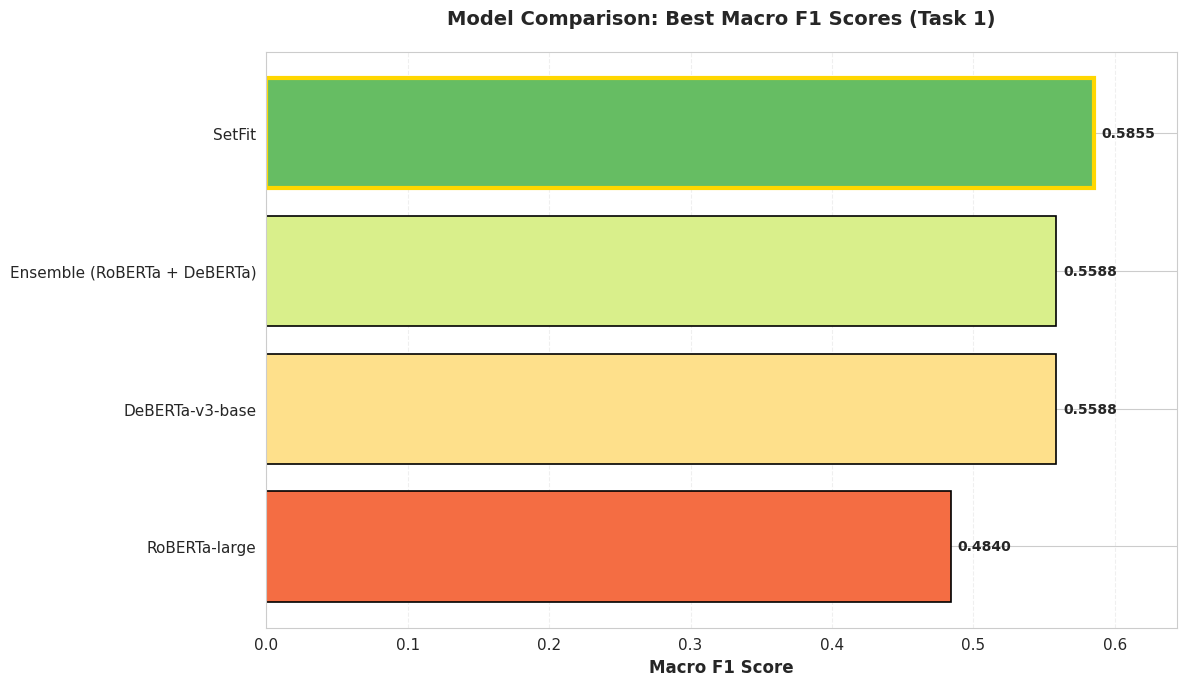

In [ ]:

# --- Visualization: Model Comparison (Task 1) ---
"""
Model Comparison Visualization for Task 1
Displays the best Macro F1 scores for all models tested (update scores after runs).
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from pathlib import Path

plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

RESULTS_DIR = Path(LOCAL_RESULTS_PATH)

def macro_f1_from_csv(path: Path) -> float:
    df = pd.read_csv(path)
    # normalize common column names
    if "true_labels" in df.columns and "pred_labels" in df.columns:
        y_true, y_pred = df["true_labels"], df["pred_labels"]
    elif "true" in df.columns and "pred" in df.columns:
        y_true, y_pred = df["true"], df["pred"]
    else:
        raise ValueError(f"{path.name}: expected columns true_labels/pred_labels (or true/pred). Found: {df.columns.tolist()}")
    return float(f1_score(y_true, y_pred, average="macro"))

model_files = {
    "SetFit": RESULTS_DIR / "setfit-direct_clarity.csv",
    "XLNet-large": RESULTS_DIR / "xlnet-large-direct_clarity.csv",
    "RoBERTa-large": RESULTS_DIR / "roberta-large-direct_clarity.csv",
    "DeBERTa-v3-base": RESULTS_DIR / "deberta-v3-base-direct_clarity.csv",
    "Ensemble (RoBERTa + DeBERTa)": RESULTS_DIR / "ensemble-roberta-deberta-direct_clarity.csv",
}

model_results = {}
for name, path in model_files.items():
    if path.exists():
        model_results[name] = macro_f1_from_csv(path)
    else:
        model_results[name] = None  # missing file

# plot only available results
available = {k: v for k, v in model_results.items() if v is not None}
missing = [k for k, v in model_results.items() if v is None]
if not available:
    raise FileNotFoundError(f"No result CSVs found in {RESULTS_DIR}. Missing: {missing}")

sorted_results = dict(sorted(available.items(), key=lambda x: x[1]))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(sorted_results)))

fig, ax = plt.subplots(figsize=(12, 7))
models = list(sorted_results.keys())
scores = list(sorted_results.values())
bars = ax.barh(models, scores, color=colors, edgecolor='black', linewidth=1.2)
ax.set_xlabel('Macro F1 Score', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison: Best Macro F1 Scores (Task 1)', fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(0, max(scores + [0.01]) * 1.1)
ax.grid(axis='x', alpha=0.3, linestyle='--')

for bar, score in zip(bars, scores):
    width = bar.get_width()
    ax.text(width + 0.005, bar.get_y() + bar.get_height()/2, f'{score:.4f}', ha='left', va='center', fontweight='bold', fontsize=10)

best_idx = scores.index(max(scores)) if scores else 0
if scores:
    bars[best_idx].set_edgecolor('gold')
    bars[best_idx].set_linewidth(3)

plt.tight_layout()
plt.savefig('Task1_model_comparison.png', dpi=300, bbox_inches='tight')
print("Saved visualization as 'Task1_model_comparison.png'")
plt.show()


Saved plot: /content/SemEvalProject-NLP-class/results/Task1_model_comparison.png
Created: /content/SemEvalProject-NLP-class/artifacts.zip


/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow())
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/google/protobuf/internal/well_known_types.py:178: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  self.FromDatetime(datetime.datetime.utcnow(

Copied zip to Drive: /content/drive/MyDrive/SemEval_QEvasion/results/artifacts.zip


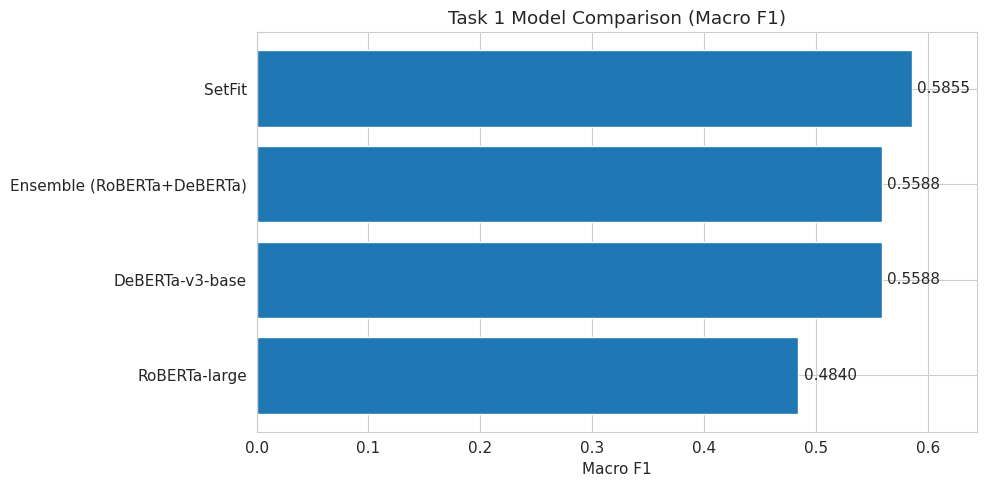

In [ ]:
from pathlib import Path
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

RESULTS_DIR = Path(LOCAL_RESULTS_PATH)

def macro_f1(path: Path) -> float:
    df = pd.read_csv(path)
    return float(f1_score(df["true_labels"], df["pred_labels"], average="macro",
                          labels=["Clear Reply","Ambivalent","Clear Non-Reply"]))

files = {
    "SetFit": RESULTS_DIR / "setfit-direct_clarity.csv",
    "RoBERTa-large": RESULTS_DIR / "roberta-large-direct_clarity.csv",
    "DeBERTa-v3-base": RESULTS_DIR / "deberta-v3-base-direct_clarity.csv",
    "Ensemble (RoBERTa+DeBERTa)": RESULTS_DIR / "ensemble-roberta-deberta-direct_clarity.csv",
}

scores = {k: macro_f1(v) for k, v in files.items() if v.exists()}
if not scores:
    raise FileNotFoundError(f"No result CSVs found in {RESULTS_DIR}")

# bar chart
items = sorted(scores.items(), key=lambda x: x[1])
labels = [k for k, _ in items]
vals = [v for _, v in items]

fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(labels, vals)
ax.set_xlabel("Macro F1")
ax.set_title("Task 1 Model Comparison (Macro F1)")
ax.set_xlim(0, max(vals) * 1.1)
for i, v in enumerate(vals):
    ax.text(v + 0.005, i, f"{v:.4f}", va="center")
plt.tight_layout()

plot_path = RESULTS_DIR / "Task1_model_comparison.png"
plt.savefig(plot_path, dpi=300, bbox_inches="tight")
print("Saved plot:", plot_path)

# zip (one-liner equivalent)
import subprocess
# subprocess.check_call(["bash","-lc", f'cd "{PROJECT_ROOT}" && zip -r artifacts.zip results models checkpoints'])
zip_path = PROJECT_ROOT / "artifacts.zip"
print("Created:", zip_path)

# from google.colab import drive
# drive.mount("/content/drive")
# !mkdir -p "/content/drive/MyDrive/SemEval_QEvasion" && cp -r "/content/SemEvalProject-NLP-class/results" "/content/SemEvalProject-NLP-class/models" "/content/SemEvalProject-NLP-class/checkpoints" "/content/drive/MyDrive/SemEval_QEvasion/"

# from google.colab import files
# files.download("/content/SemEvalProject-NLP-class/artifacts.zip")

# copy zip to Drive (recommended) if DRIVE_SAVE_PATH exists
try:
    subprocess.check_call(["bash","-lc", f'mkdir -p "{DRIVE_ARTIFACTS_DIR}/results" && cp "{zip_path}" "{DRIVE_ARTIFACTS_DIR}/results/"'])
    print("Copied zip to Drive:", f"{DRIVE_ARTIFACTS_DIR}/results/artifacts.zip")
except Exception as e:
    print("Drive copy skipped/failed:", e)

# # attempt browser download (may require user click)
# from google.colab import files, runtime
# files.download(str(zip_path))

# # disconnect + delete runtime (stops credits burn)
# runtime.unassign()

In [ ]:
!zip -r artifacts.zip checkpoints/ models/ results/

  adding: checkpoints/ (stored 0%)
  adding: checkpoints/checkpoint-3234/ (stored 0%)
  adding: checkpoints/checkpoint-3234/rng_state.pth (deflated 26%)
  adding: checkpoints/checkpoint-3234/model.safetensors (deflated 7%)
  adding: checkpoints/checkpoint-3234/trainer_state.json (deflated 78%)
  adding: checkpoints/checkpoint-3234/optimizer.pt (deflated 20%)
  adding: checkpoints/checkpoint-3234/tokenizer_config.json (deflated 75%)
  adding: checkpoints/checkpoint-3234/README.md (deflated 61%)
  adding: checkpoints/checkpoint-3234/config.json (deflated 47%)
  adding: checkpoints/checkpoint-3234/special_tokens_map.json (deflated 85%)
  adding: checkpoints/checkpoint-3234/modules.json (deflated 53%)
  adding: checkpoints/checkpoint-3234/config_sentence_transformers.json (deflated 40%)
  adding: checkpoints/checkpoint-3234/scheduler.pt (deflated 61%)
  adding: checkpoints/checkpoint-3234/tokenizer.json (deflated 71%)
  adding: checkpoints/checkpoint-3234/1_Pooling/ (stored 0%)
  adding: c